## USGS Aquifer Selection
Code to select the 25 aquifers with the highest pumping rates <br>
Link to report: https://pubs.usgs.gov/publication/cir1464 <br>
USGS principal aquifers shapefile: https://www.sciencebase.gov/catalog/item/63140610d34e36012efa385d

In [34]:
# IMPORTS
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import contextily as cx
import requests
import calendar
from importlib import reload

from datetime import datetime, timedelta
from shapely.geometry import Point
from io import StringIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

<module 'Src.func_ko' from 'C:\\Users\\kondr\\Documents\\GitHub\\HighMagFlows_EPA_Project\\Src\\func_ko.py'>

### Import aquifers

In [35]:
# Aquifers to plot and dataset to use
lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
aq_usgs = gpd.read_file('ShapeFiles/Aquifers_USGS/us_aquifers.shp')

In [37]:
aq_usgs['AQ_NAME'].unique()

array(['Other rocks', 'Puget Sound aquifer system',
       'Upper Cretaceous aquifers', 'Lower Tertiary aquifers',
       'Northern Rocky Mountains Intermontane Basins aquifer system',
       'Pacific Northwest basin-fill aquifers',
       'Lower Cretaceous aquifers', 'Paleozoic aquifers',
       'Pacific Northwest basaltic-rock aquifers',
       'Columbia Plateau basaltic-rock aquifers',
       'Columbia Plateau basin-fill aquifers', 'Jacobsville aquifer',
       'New York and New England carbonate-rock aquifers',
       'Cambrian-Ordovician aquifer system',
       'Valley and Ridge carbonate-rock aquifers',
       'California Coastal Basin aquifers',
       'Basin and Range basin-fill aquifers', 'Surficial aquifer system',
       'Valley and Ridge aquifers',
       'Texas coastal uplands aquifer system',
       'Coastal lowlands aquifer system',
       'Hawaiian Sedimentary deposit aquifers',
       'Hawaiian Volcanic-rock aquifers', 'Silurian-Devonian aquifers',
       'Snake River 

### Select 25 aquifers with highest pumping rates

In [38]:
selected_aq_list = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system',
                'Columbia Plateau basaltic-rock aquifers',
                'Rio Grande aquifer system',
                'Mississippi embayment aquifer system',
                'Cambrian-Ordovician aquifer system',
                'Southeastern Coastal Plain aquifer system',
                'Biscayne aquifer',
                'Edwards-Trinity aquifer system',
                'Northern Rocky Mountains Intermontane Basins aquifer system',
                'Piedmont and Blue Ridge crystalline-rock aquifers',
                'Surficial aquifer system',
                'Valley and Ridge aquifers',
                'Silurian-Devonian aquifers',
                'Pacific Northwest basaltic-rock aquifers',
                'Willamette Lowland basin-fill aquifers',
                'Lower Cretaceous aquifers']

In [42]:
aq_usgs_selected = aq_usgs.loc[aq_usgs['AQ_NAME'].isin(selected_aq_list)]
aq_usgs_selected = aq_usgs_selected.dissolve(by='AQ_NAME', as_index=False)
aq_usgs_selected.to_file('ShapeFiles/Aquifers_USGS_25', driver='ESRI Shapefile')

### Plot aquifers and lower48

In [43]:
show_huc4 = False
show_gauges = False
# True if you want to save image. Overwrite true if you want to overwrite existing image of same name
save_img = False
overwrite = True
# True if you want a context basemap (adds runtime)
basemap = False

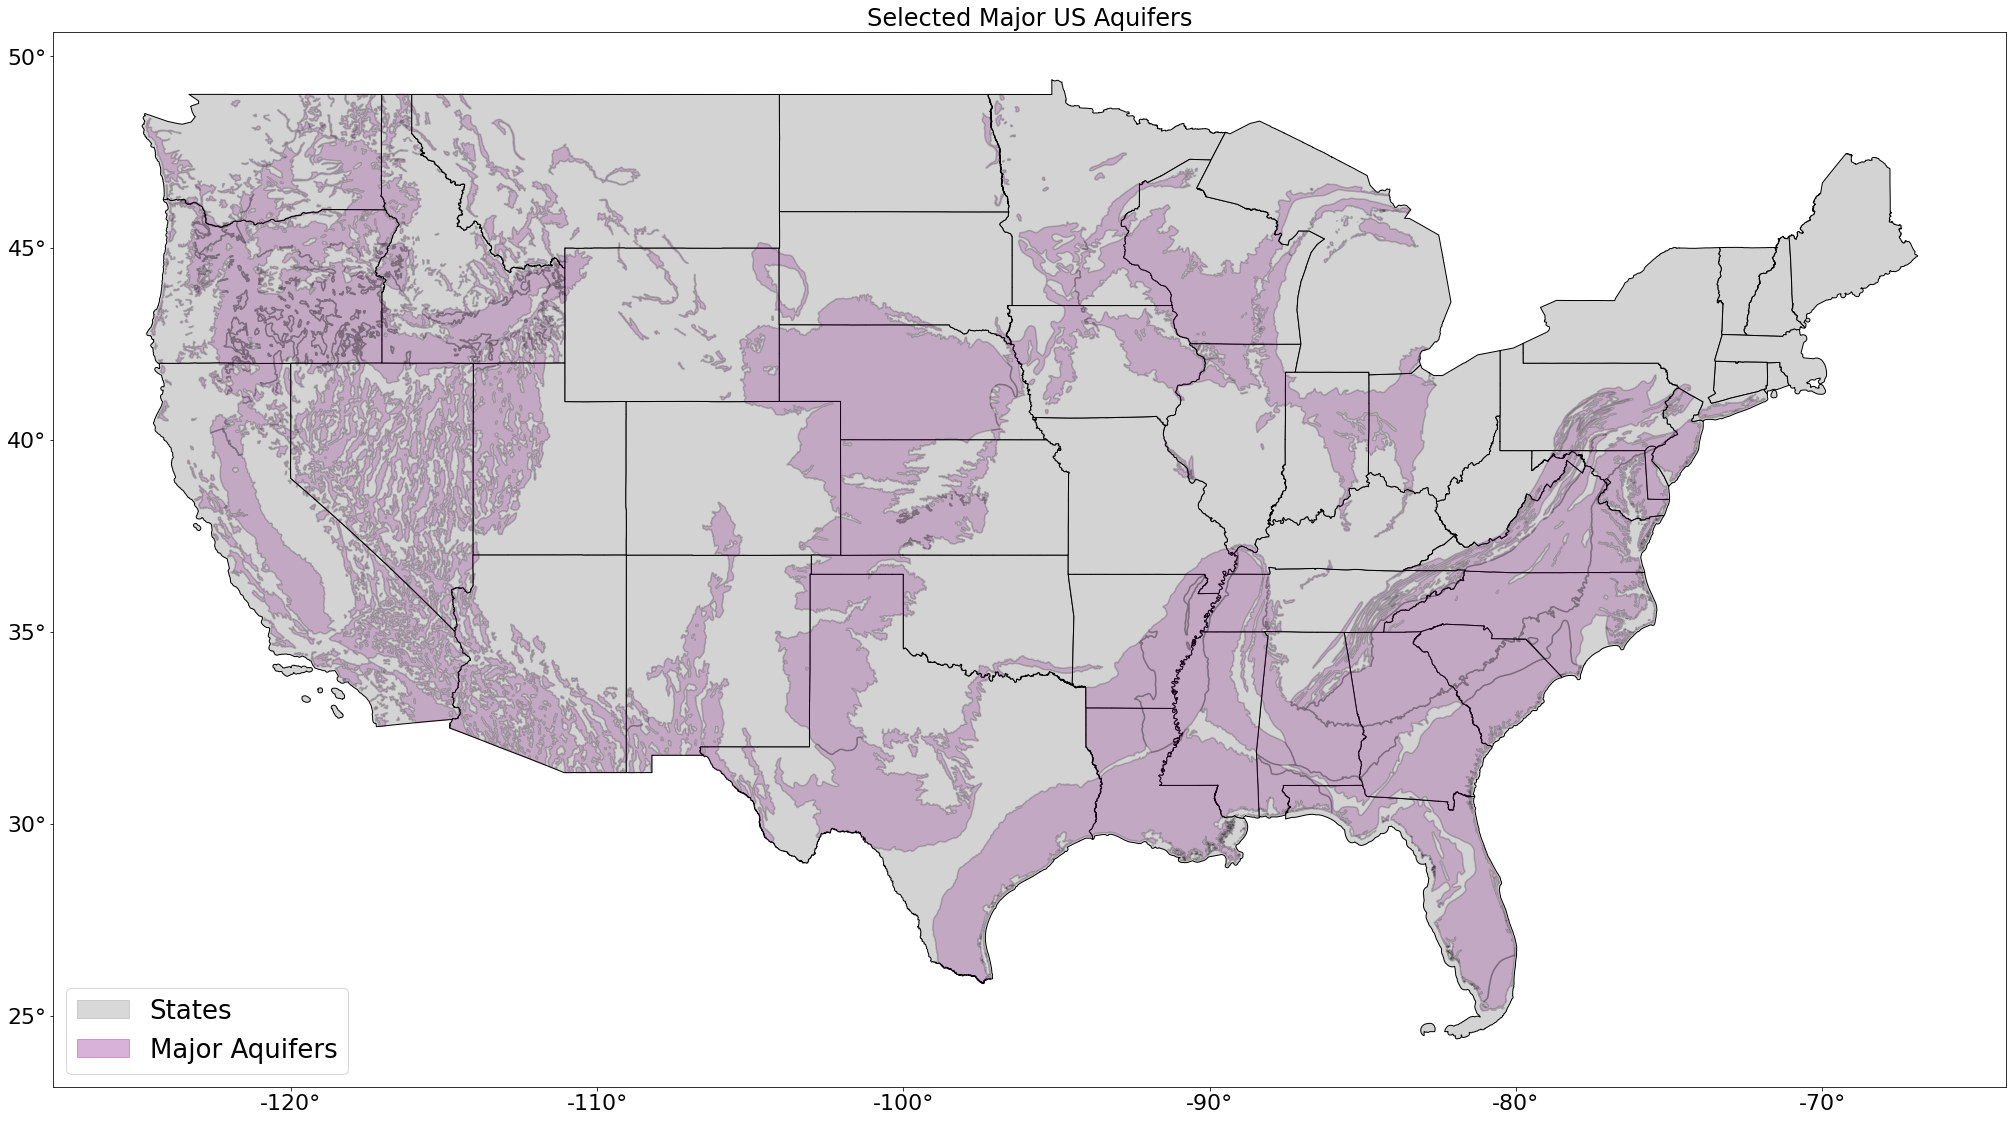

In [44]:
fig, ax = plt.subplots(figsize=(35, 35))
#plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)
plt.title(f'Selected Major US Aquifers', fontsize=24)

# Lower-48 Plot
if not basemap:       
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0)  
    
# Plot counties
#counties_us = counties_us.to_crs(epsg=4269)
#counties_us = counties_us.to_crs('ESRI:102003')
#counties_plot = counties_us.plot(ax=ax, edgecolor='white', facecolor='none', alpha = 0.5, legend=True)

aq_usgs_selected = aq_usgs_selected.to_crs(epsg=4269)
aq_usgs_selected.plot(ax=ax, edgecolor='black', facecolor='purple', linewidth=1.5, alpha=0.2)

if show_huc4:
    for aq in aquifers:
        fn.plot_huc4(ax, huc4_shape, codes=aq.huc4s)
        
# Plot streams
#streams_plot = streams.plot(ax=ax, edgecolor='blue', facecolor='blue', alpha = 0.5, legend=True)

if basemap:
    fn.plot_basemap(ax)
    
# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='grey', alpha=0.3), 
                Patch(color='purple', alpha=0.3)])  # Add the handle for legend
labels.extend(['States', 'Major Aquifers'])  # Add the label for legend
#legend = ax.get_legend()
ax.legend(handles, labels, loc='lower left', fontsize=26)

ax.tick_params(axis='both', which='major', labelsize=22)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
#ax.axis("off")

# Save images if they don't exist or if overwrite is True
if save_img:
    img_path = f'Saved_Visuals/aquifer_map.png'
    fn.save_plot_as_image(img_path, overwrite)    

In [45]:
aq_usgs_selected

,AQ_NAME,geometry,OBJECTID_1,ROCK_NAME,ROCK_TYPE,AQ_CODE,Shape_Leng,Shape_Area
0,Basin and Range basin-fill aquifers,"MULTIPOLYGON (((-116.25749 37.01817, -116.2698...",304,Unconsolidated sand and gravel aquifers,100,101,0.812113,0.014565
1,Biscayne aquifer,"MULTIPOLYGON (((-80.03410 26.57563, -80.03414 ...",4042,Carbonate-rock aquifers,400,414,0.055446,0.000144
2,California Coastal Basin aquifers,"MULTIPOLYGON (((-116.53372 32.68472, -116.5384...",300,Unconsolidated sand and gravel aquifers,100,103,0.080710,0.000168
3,Cambrian-Ordovician aquifer system,"MULTIPOLYGON (((-90.56068 38.97694, -90.57088 ...",256,Sandstone aquifers,300,312,0.044465,0.000133
4,Central Valley aquifer system,"POLYGON ((-122.19432 40.28795, -122.20860 40.2...",1854,Unconsolidated sand and gravel aquifers,100,106,23.610212,5.350749
5,Coastal lowlands aquifer system,"MULTIPOLYGON (((-90.35358 29.13644, -90.35354 ...",341,Semiconsolidated sand aquifers,200,201,0.048333,0.000102
6,Columbia Plateau basaltic-rock aquifers,"MULTIPOLYGON (((-119.07155 46.07099, -119.1147...",122,Igneous and metamorphic-rock aquifers,600,607,0.940912,0.031896
7,Edwards-Trinity aquifer system,"MULTIPOLYGON (((-97.90401 30.62984, -97.92529 ...",3004,Sandstone and carbonate-rock aquifers,500,501,32.791623,2.068723
8,Floridan aquifer system,"MULTIPOLYGON (((-83.08128 29.23286, -83.08336 ...",3581,Carbonate-rock aquifers,400,413,0.025269,0.000037
9,High Plains aquifer,"POLYGON ((-99.50568 43.18556, -99.50186 43.182...",1110,Unconsolidated sand and gravel aquifers,100,107,138.179777,47.591659
